# Using MLflow to track and register ML models for the case of MNIST dataset

**Prerequisites:**
1. The basic machine learning libraries for python such as scikit-learn, pandas, numpy
2. Already installed MLflow

Initially to run MLflow locally we use SQLite backend in this case called mlflow.db

In [ ]:
!mlflow ui --backend-store-uri sqlite:///mlflow.db

In this step we need to add an experminet to the MLflow

In [4]:
import mlflow


mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("mnist-mlflow")

2023/01/11 11:55:16 INFO mlflow.tracking.fluent: Experiment with name 'mnist-mlflow' does not exist. Creating a new experiment.


<Experiment: artifact_location='./mlruns/1', creation_time=1673438116530, experiment_id='1', last_update_time=1673438116530, lifecycle_stage='active', name='mnist-mlflow', tags={}>

Now we load and plot the MNIST data

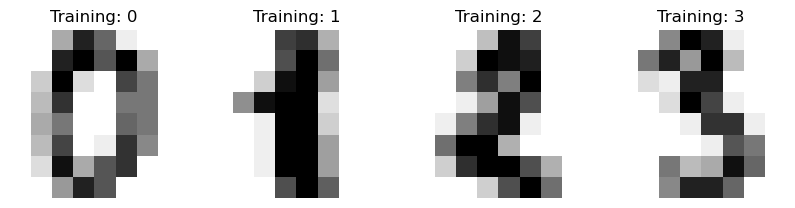

In [5]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Train a SVM modela with mlflow and score the accuracy metric

In [7]:
with mlflow.start_run():

    mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")
    mlflow.set_tag("data scientist", "sali")
    
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))

    # Split data into 50% train and 50% test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        data, digits.target, test_size=0.5, shuffle=False
    )
    # Create a classifier: a support vector classifier
    clf = svm.SVC(gamma=0.001)

    mlflow.set_tag("model", clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = round(metrics.accuracy_score(y_test, y_pred),4)
    mlflow.log_metric("accuracy", accuracy)

# You should be able to see the svm model registered in the mlflow

We can also extend the models to different approaches. 
Here we also use autolog which besides the model parameters we get the
- MLmodel
- conda yaml file, which defines the environment
- requirements.txt
- training confusion matrix
- training precision recall curve

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
svm = svm.SVC(gamma=0.001)

models = [knn, ada, rf, svm]

mlflow.sklearn.autolog()
for model in models:
    with mlflow.start_run():

        mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")
        mlflow.set_tag("data scientist", "sali")
        
        n_samples = len(digits.images)
        data = digits.images.reshape((n_samples, -1))

        # Split data into 50% train and 50% test subsets
        X_train, X_test, y_train, y_test = train_test_split(
            data, digits.target, test_size=0.5, shuffle=False
        )
        # Create a classifier: a support vector classifier
        clf = model

        mlflow.set_tag("model", clf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = round(metrics.accuracy_score(y_test, y_pred),4)
        mlflow.log_metric("accuracy", accuracy)

2023/01/11 12:02:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2023/01/11 12:02:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/ubuntu/miniconda3/envs/mlops/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
/home/ubuntu/miniconda3/envs/mlops/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
